In [ ]:
import girder_client
import ocr 
import numpy as np
import cv2
import PIL
import requests

In [2]:
gc = girder_client.GirderClient(apiUrl='http://transplant.digitalslidearchive.emory.edu:8080/api/v1')
gc.authenticate(interactive=True)

Login or email: admin
Password for admin: ········


In [3]:
imageSet = gc.get("item?folderId=5cb8e617e6291400676085d0&limit=0")

In [4]:
def get_image(gc, _id, width=256, height=256, array=False, label=False):
    """get_label_image()
    Given a girder id, get the label image if it exists otherwise throws error.

    INPUTS
    ------
    gc : girder_client.GirderClient
        Girder client connected to a girder API.
    _id : str (item)
        Girder id of item to get label for.
    width : int (default 256)
        Width to return label image.
    height : int (default 256)
        Height to return label image.
    array : bool (default False)
        True to return label image in ndarray form, False to return PIL image.

    RETURNS
    -------
    image : PIL image or ndarray
        Label image.
    """

    url = 'item/%s/tiles/images/label?encoding=JPEG' if label else 'item/%s/tiles/thumbnail'

    content = gc.get(url % (_id), jsonResp=False)
    img_array = np.fromstring(content.content, dtype=np.uint8)
    image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)


    return image

In [5]:

for i in imageSet:
    print(i['name'])
    i['labelImageBits_Small'] = get_image(gc,i['_id'],label=True)
    i['labelImageBits_Large'] = get_image(gc,i['_id'],width=512,height=512,label=True)
    
    
    img = PIL.Image.fromarray(i['labelImageBits_Large'])

    img.save(i['name']+'.label.jpg')
    
    
    r= requests.get("http://127.0.0.1:5000/label?ids=%s"%i['_id'])
    print(r.content)

1019338.svs


/home/dagutman/.conda/envs/isicml/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /label?ids=5cb8e68ae629140067608a4c (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fb03b0822e8>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [1]:
PIL.Image.fromarray(i['labelImageBits_Large'])
#ocr.robust_ocr(myTestImg,ocr.regex1)

NameError: name 'PIL' is not defined

In [10]:
myCroppedImage
from pyzbar import pyzbar

bImage = PIL.Image.open("./bookmark.png")

dm = pyzbar.decode(bImage)

In [16]:
str(dm[0].data)

"b'MEBKM:TITLE:QR Tools;URL:https://launchpad.net/qr-tools/;;'"

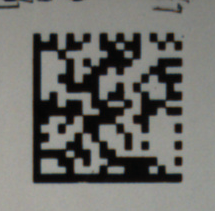

In [8]:
(w,h) = PIL.Image.fromarray(i['labelImageBits_Large']).size


myCroppedImage = PIL.Image.fromarray(i['labelImageBits_Large']).crop((w/2,h/6,w*0.8,h*0.45))

myCroppedImage

In [58]:
modImg = cv2.cvtColor(np.array(myCroppedImage), cv2.COLOR_BGR2GRAY)

image = cv2.imread(args["image"])
pyzbar.decode(PIL.Image.fromarray(modImg))

[]

In [60]:
!pip install pylibdmtx
# pip install pylibdmtx[scripts]
# Example usage
# The decode function accepts instances of PIL.Image.

# >>> from pylibdmtx.pylibdmtx import decode
# >>> from PIL import Image

In [62]:
from pylibdmtx.pylibdmtx import decode
decode(modImg)

[Decoded(data=b'S16-7006;S1;EMYO', rect=Rect(left=32, top=27, width=149, height=150))]

In [ ]:
# def robust_ocr(img, scheme):

#     goodResults = {}  # Output

#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     without_skew = remove_skewness(gray)

#     crop_text = crop_only_text(without_skew)


#     results = clean_ocr_output(pytesseract.image_to_string(crop_text))
#     m = check_scheme(results, scheme)
#     if m:
#         goodResults = m
#     return goodResults, results


In [ ]:
#### testImage is a numpy array
npImage = i['labelImageBits_Large']


(h,w,c) = npImage.shape

### These are just guesstimates based on some weird JC did
## numpy is y,x ... unfortunately!
top = 0
left = int(w/10) 
width = int(w*0.9)
height = int(h*0.5)
print(top,left,width,height)
npImageCrop = i['labelImageBits_Large'][top:height,left:width,:]

PIL.Image.fromarray(npImageCrop)
# gray = cv2.cvtColor(npImage,cv2.COLOR_BGR2GRAY)
# without_skew = ocr.remove_skewness(gray)

# crop_text = ocr.crop_only_text(gray)


In [6]:
import qrtools

In [11]:

from pyzbar import pyzbar

pyzbar.decode()

AttributeError: module 'pyzbar' has no attribute 'decode'

In [ ]:
ocr.pytesseract.image_to_string(myTestImg)

In [ ]:
import cv2
import numpy as npThank
def box_extraction(img_for_box_extraction_path, cropped_dir_path):
img = cv2.imread(img_for_box_extraction_path, 0)  # Read the image
    (thresh, img_bin) = cv2.threshold(img, 128, 255,
                                      cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # Thresholding the image
    img_bin = 255-img_bin  # Invert the image
cv2.imwrite("Image_bin.jpg",img_bin)
   
    # Defining a kernel length
    kernel_length = np.array(img).shape[1]//40
     
    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# Morphological operation to detect verticle lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
    alpha = 0.5
    beta = 1.0 - alpha
    # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
    img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
    img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
    (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# For Debugging
    # Enable this line to see verticle and horizontal lines in the image which is used to find boxes
    cv2.imwrite("img_final_bin.jpg",img_final_bin)
    # Find contours for image, which will detect all the boxes
    im2, contours, hierarchy = cv2.findContours(
        img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sort all the contours by top to bottom.
    (contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
idx = 0
    for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
        if (w > 80 and h > 20) and w > 3*h:
            idx += 1
            new_img = img[y:y+h, x:x+w]
            cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
box_extraction("41.jpg", "./Cropped/")

In [ ]:
img = gray
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # Thresholding the image
img_bin = 255-img_bin  # Invert the image

# Defining a kernel length
kernel_length = np.array(img).shape[1]//40

# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Morphological operation to detect verticle lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)

# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)




In [ ]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# # For Debugging
#     # Enable this line to see verticle and horizontal lines in the image which is used to find boxes
#     cv2.imwrite("img_final_bin.jpg",img_final_bin)
#     # Find contours for image, which will detect all the boxes
im2, contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
idx = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    print(x,y,w,h)
# # If the box height is greater then 20 widht is >80, then only save it as a box in "cropped/" folder.
    if (w > 40 and h > 20) and w > h:
        idx += 1
        new_img = img[y:y+h, x:x+w]
        print("Foudn image...")
        cv2.imwrite("meh"+str(idx) + '.png', new_img)


In [ ]:
import numpy as np
import argparse
import imutils
import cv2
 
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [ ]:
horizontal_lines_img

PIL.Image.fromarray(img_bin)

PIL.Image.fromarray(horizontal_lines_img)

PIL.Image.fromarray(verticle_lines_img)

PIL.Image.fromarray(img_final_bin)

PIL.Image.fromarray(im2)
